

# Project: Investigate The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I chose the movie dataset for my project. This dataset contain the information of over 10,000 movies! The questions that we are looking to answer are: Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Some things to take note about our dataset. Any movie that the budget is 0 should be treated as missing values as per the documentation found [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata). Also we are assuming that the values for budget, revenue, budget_adj, and revenue_adj are in USD. Finally the popularity is a metric used to help boost search results and discover options. [source](https://developers.themoviedb.org/3/discover/movie-discover) 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning
1. Remove duplicated fields
2. Drop columns that aren't needed
3. Drop entries that are missing values

#### 1. Remove duplicated fields
Let's check to see if the dataset has any duplicate fields.

In [3]:
print('Number of duplicated entries: {}'.format(df.duplicated().sum())) # the result is 1

Number of duplicated entries: 1


Since the dataset has 1 duplicated field let's get rid of it.

In [4]:
#dropping duplicated values
df.drop_duplicates(inplace=True)

#### 2. Drop columns that aren't needed
The next step is to drop columns that aren't needed to answer our questions.

__imbd_id:__ This is a unique value that helps id movies since we already have an id that is unique this field is not needed.

__budget and revenue:__ Both of these fields are being dropped because the dataset contains budget_adj and revenue_adj that has the values adjusted for inflation.

__homepage, taglines, overview:__ These columns contain data that aren't relevant to our questions.

In [5]:
drop_list = ['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'overview']
for c in drop_list:
    df.drop(columns = c, inplace=True)

#### 3. Remove missing values
Let's check if our dataframe has missing values

In [6]:
#count the number of missing values
df.isna().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Let's drop the rows with missing values.

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 15 columns):
id                      8666 non-null int64
popularity              8666 non-null float64
original_title          8666 non-null object
cast                    8666 non-null object
director                8666 non-null object
keywords                8666 non-null object
runtime                 8666 non-null int64
genres                  8666 non-null object
production_companies    8666 non-null object
release_date            8666 non-null object
vote_count              8666 non-null int64
vote_average            8666 non-null float64
release_year            8666 non-null int64
budget_adj              8666 non-null float64
revenue_adj             8666 non-null float64
dtypes: float64(4), int64(4), object(7)
memory usage: 846.3+ KB


We also need to make sure that the movies budget_adj is not equal to 0

In [8]:
df = df[df['budget_adj'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4726 entries, 0 to 10865
Data columns (total 15 columns):
id                      4726 non-null int64
popularity              4726 non-null float64
original_title          4726 non-null object
cast                    4726 non-null object
director                4726 non-null object
keywords                4726 non-null object
runtime                 4726 non-null int64
genres                  4726 non-null object
production_companies    4726 non-null object
release_date            4726 non-null object
vote_count              4726 non-null int64
vote_average            4726 non-null float64
release_year            4726 non-null int64
budget_adj              4726 non-null float64
revenue_adj             4726 non-null float64
dtypes: float64(4), int64(4), object(7)
memory usage: 461.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genres are most popular from year to year?
To do this first we need to seperate the genres column to seperate columns.

In [9]:
genres = df['genres'].str.split('|', expand=True)
genres.rename(columns = lambda x: 'genres'+ str(x), inplace=True)
genres_df = pd.concat([df,genres], axis=1)
genres_df.drop(labels='genres', inplace=True, axis=1)
genres_df.head()

,id,popularity,original_title,cast,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres0,genres1,genres2,genres3,genres4
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


Now we are going to use pandas crosstab function to count the number of times the genres appear and plot the results on a heatmap.

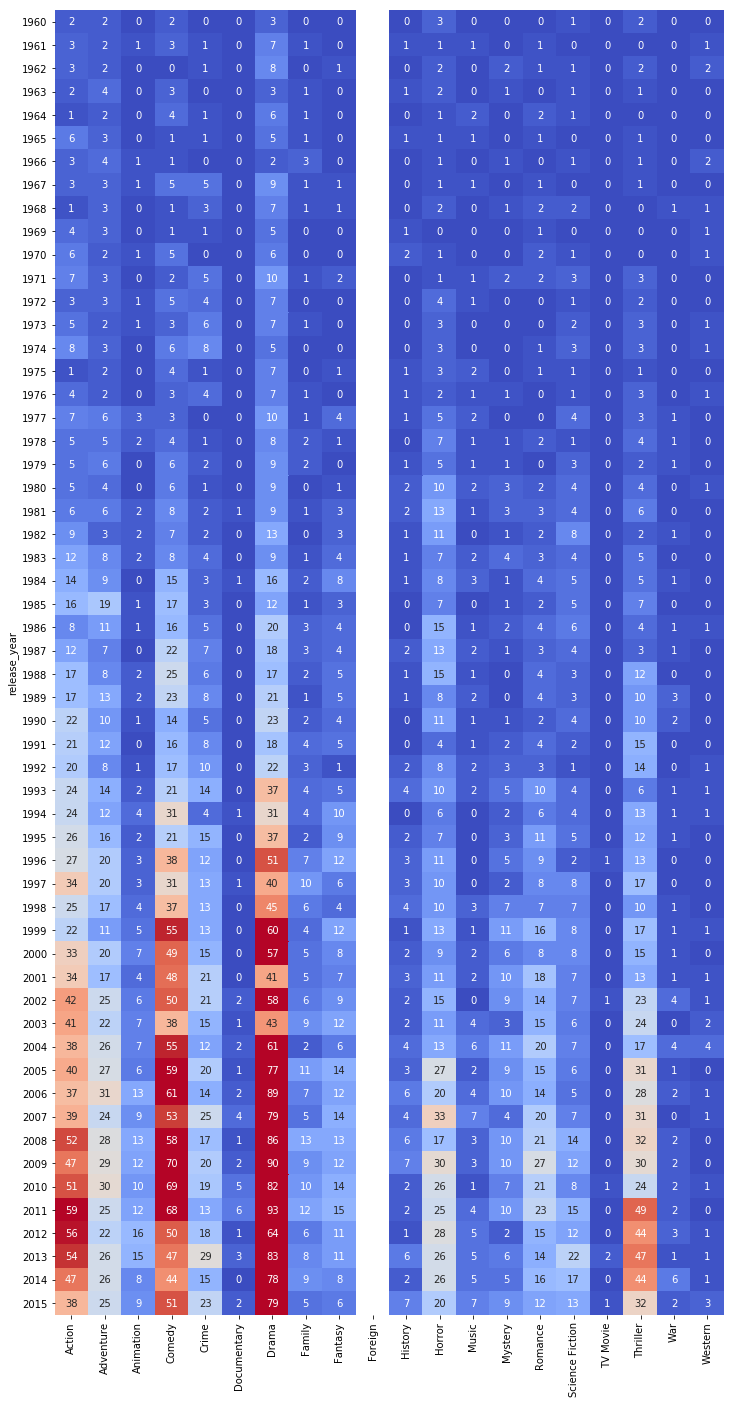

In [11]:
q1 = pd.crosstab(genres_df['release_year'], genres_df['genres0'], dropna = False)
q2 = pd.crosstab(genres_df['release_year'], genres_df['genres1'], dropna = False)
q3 = pd.crosstab(genres_df['release_year'], genres_df['genres2'], dropna = False)
q4 = pd.crosstab(genres_df['release_year'], genres_df['genres3'], dropna = False)
q5 = pd.crosstab(genres_df['release_year'], genres_df['genres4'], dropna = False)
genres_count = q1.add(q2)
genres_count.add(q3)
genres_count.add(q4)
genres_count.add(q5)

plt.figure(figsize=(12,24))
sns.heatmap(genres_count,
            cmap = 'coolwarm', 
            robust = True, 
            annot = True, 
            cbar = False);

### What kinds of properties are associated with movies that have high revenues?
Let's filter our dataset by using only the last quartile filtered by the revenue_adj column

In [12]:
genres_df['revenue_adj'].describe()

count    4.726000e+03
mean     1.105502e+08
std      2.024264e+08
min      0.000000e+00
25%      3.785180e+05
50%      3.546360e+07
75%      1.267480e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [14]:
high_rev = genres_df[genres_df['revenue_adj'] >= 1.267480e+08]
high_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 0 to 10835
Data columns (total 19 columns):
id                      1182 non-null int64
popularity              1182 non-null float64
original_title          1182 non-null object
cast                    1182 non-null object
director                1182 non-null object
keywords                1182 non-null object
runtime                 1182 non-null int64
production_companies    1182 non-null object
release_date            1182 non-null object
vote_count              1182 non-null int64
vote_average            1182 non-null float64
release_year            1182 non-null int64
budget_adj              1182 non-null float64
revenue_adj             1182 non-null float64
genres0                 1182 non-null object
genres1                 1046 non-null object
genres2                 789 non-null object
genres3                 357 non-null object
genres4                 101 non-null object
dtypes: float64(4), int64(4), object(11)

Now that we have a filtered version of our dataset let's check to see if all of these movies had a high budget.

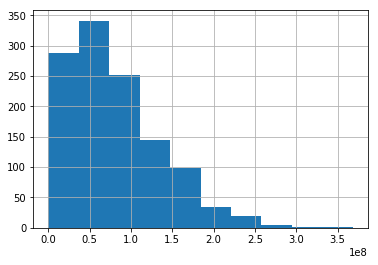

In [16]:
high_rev['budget_adj'].hist();

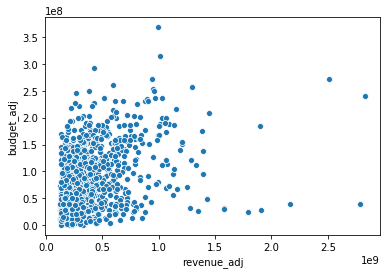

In [22]:
sns.scatterplot(x='revenue_adj', y='budget_adj', data=high_rev);

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!